In [ ]:
# Colab
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum > /dev/null 2>&1
!sudo fc-cache -fv > /dev/null 2>&1
!rm ~/.cache/matplotlib -rf > /dev/null 2>&1

# 0.Pacakges & Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 스타일 설정
sns.set_style("whitegrid")  # 기본 스타일 설정
plt.rcParams['axes.facecolor'] = '#edeae5'  # 배경색 설정

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# 나눔고딕 설정
# 설치한 나눔 폰트의 경로를 지정합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 나눔 폰트를 설정합니다.
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 데이터 보기
df = pd.read_csv('/content/drive/MyDrive/스파르타코딩/[프로젝트]/기초_데이터/product.csv')
df.head()

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0


In [ ]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   order_id      object
 1   user_id       object
 2   page_id       object
 3   product       object
 4   site_version  object
 5   time          object
 6   title         object
 7   target        int64 
dtypes: int64(1), object(7)
memory usage: 517.0+ MB


In [ ]:
# 날짜 데이터 변환 및 날짜 관련 컬럼 생성
df['time'] = pd.to_datetime(df['time'])
# 날짜
df['date'] = df['time'].dt.date
# 요일명
df['weekday'] = df['time'].dt.day_name()
# hour 시
df['hour'] = df['time'].dt.hour
# 월
df['month'] = df['time'].dt.month

In [ ]:
# 데이터 요약
df.describe(include='object')

,order_id,user_id,page_id,product,site_version,title,date,weekday
count,8471220,8471220,8471220,8471220,8471220,8471220,8471220,8471220
unique,8471220,4254619,7393316,5,2,3,151,7
top,cfcd208495d565ef66e7dff9f98764da,6e1d9fca53a19d4f105947348fd1d627,a3d2de7675556553a5f08e4c88d2c228,clothes,mobile,banner_show,2019-05-20,Thursday
freq,1,23,248722,1786438,6088335,7393314,80025,1228342


In [ ]:
# 중복값 확인
df.duplicated().sum()

0

In [ ]:
# 결측값 확인
df.isnull().sum()

,0
order_id,0
user_id,0
page_id,0
product,0
site_version,0
time,0
title,0
target,0
date,0
weekday,0


In [ ]:
# # 필요하지 않은 컬럼 삭제
# df.drop(columns = ['order_id', 'target'], inplace=True)

# 1.Object(목표) & Necessary data(데이터)

## 목표 : 내부 vs 외부 광고 효과 비교로 최적의 배너 운영 전략 수립
## -- 가정 --
### 내부 : CPC 단가 100원
### 외부 : CPC 단가 500원
### 외부 : CTR 2%

## 1-1 site_version 분포 시각화

In [ ]:
df['site_version'].value_counts()

,count
site_version,
mobile,6088335
desktop,2382885


In [ ]:
# Site Version별 개수 시각화
labels = ['desktop', 'mobile']
values = [2382885, 6088335]

# 막대 그래프 생성
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=values,
    text=values,
    textposition='auto',
    marker=dict(color=['#656462', '#FF5733'])  # desktop은 회색, mobile은 주황색
)])

# 배경 색상 및 크기 설정
fig.update_layout(
    paper_bgcolor="#edeae5",  # 전체 배경 색
    plot_bgcolor="#edeae5",   # 플롯 배경 색
    xaxis_title=dict(text="기기 유형", font=dict(size=20)),  # X축 제목
    yaxis_title=dict(text="개수", font=dict(size=20)),        #
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    width=500,                  # 그래프 너비
    height=300,                 # 그래프 높이
    bargap=0.3                  # 막대 간 간격
)

fig.show()

## 1-2 product 시각화

In [ ]:
df['product'].value_counts()

,count
product,
clothes,1786438
company,1725056
sneakers,1703342
sports_nutrition,1634625
accessories,1621759


In [ ]:
# 데이터
labels = ['accessories', 'clothes', 'company', 'sneakers', 'sports_nutrition']
values = [1621759, 1786438, 1725056, 1703342, 1634625]

# 채도가 낮은 색상 팔레트
colors = ['#b0c4de', '#d3d3d3', '#add8e6', '#d8bfd8', '#f5deb3']

# 파이 차트 생성
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    textinfo='label+percent',
    insidetextorientation='radial',
    hole=.5,
    textfont=dict(size=16),
    textposition=['outside', 'outside', 'outside', 'outside', 'outside']
)])

# 배경 색상 및 색상 팔레트 설정
fig.update_traces(marker=dict(colors=colors))
fig.update_layout(
    paper_bgcolor="#edeae5",  # 전체 배경 색
    plot_bgcolor="#edeae5"   # 플롯 배경 색
)

fig.show()

## 1-3 시계열 세션 수 시각화

In [ ]:
df_days = df.groupby(['date'])['user_id'].count().reset_index().rename(columns={'user_id' : 'session_count'})

In [ ]:
# 예시 데이터
fig = px.line(df_days, x='date', y='session_count')

# 배경 색상, 선 색상, 격자 제거 설정
fig.update_layout(
    paper_bgcolor="#edeae5",  # 뒷배경 색상
    plot_bgcolor="#edeae5",  # 선 색상
    xaxis=dict(showgrid=False), # 격자 제거
    yaxis=dict(showgrid=False),  # 격자 제거
    xaxis_title=dict(text="날짜", font=dict(size=40)),  # 제목, 크기
    yaxis_title=dict(text="세션 수", font=dict(size=40))  # 제목, 크기
)

# 선 색상 및 굵기 설정
fig.update_traces(
    line=dict(color="#656462", width=4)  # 선 색상 및 굵기
)

fig.show()

## 1-4 이벤트 퍼널

In [ ]:
# user_id별 제품 배너별 이벤트
product_event_funnel = df.groupby(['user_id', 'product']).agg({'title' : list}).reset_index()
product_event_funnel.head()

,user_id,product,title
0,0000023f507999464aa2b78875b7e5d6,accessories,[banner_show]
1,000009891526c0ade7180f8423792063,sneakers,[banner_show]
2,00000ce845c00cbf0686c992fc369df4,clothes,[banner_show]
3,00000f7264c27ba6fea0c837ed6aa0aa,sneakers,[banner_show]
4,0000104cd168386a335ba6bf6e32219d,accessories,[banner_show]


In [ ]:
# title 열의 이벤트를 새 열로 확장
event_columns = pd.get_dummies(product_event_funnel['title'].explode()).groupby(level=0).sum()
product_event_funnel = pd.concat([product_event_funnel, event_columns], axis=1)

In [ ]:
product_event_funnel.head()

,user_id,product,title,banner_click,banner_show,order
0,0000023f507999464aa2b78875b7e5d6,accessories,[banner_show],0,1,0
1,000009891526c0ade7180f8423792063,sneakers,[banner_show],0,1,0
2,00000ce845c00cbf0686c992fc369df4,clothes,[banner_show],0,1,0
3,00000f7264c27ba6fea0c837ed6aa0aa,sneakers,[banner_show],0,1,0
4,0000104cd168386a335ba6bf6e32219d,accessories,[banner_show],0,1,0


In [ ]:
# 배너 클릭을 했는데 배너 쇼가 없는 경우
product_event_funnel[(product_event_funnel['banner_click'] == 1) & (product_event_funnel['banner_show'] == 0)]

,user_id,product,title,banner_click,banner_show,order
4744668,c81e728d9d4c2f636f067f89cc14862c,sneakers,[banner_click],1,0,0


In [ ]:
# 배너 본 것으로 넣기
product_event_funnel.loc[(product_event_funnel['banner_click'] == 1) & (product_event_funnel['banner_show'] == 0), 'banner_show'] = 1

In [ ]:
# 배너 클릭이 0인데 주문을 한 경우
product_event_funnel[(product_event_funnel['order'] == 1) & (product_event_funnel['banner_click'] == 0)]

,user_id,product,title,banner_click,banner_show,order
27,00005c2d819c584e32298f8729c4b1d7,sneakers,[order],0,0,1
96,000112b726022eb7e0b4668544e19220,sports_nutrition,"[banner_show, order]",0,1,1
97,0001181bf1ad8f82dcf59c7c18343bd5,sneakers,[order],0,0,1
155,0001bde8e87c867f3d449edfcb47765e,accessories,[order],0,0,1
166,0001d62ef63d56d07065b2a97df02656,clothes,[order],0,0,1
...,...,...,...,...,...,...
6072001,fffe5849693ae049b430a45c73402a43,clothes,[order],0,0,1
6072038,fffeaaba624f657e461686b9bfc08a5b,sneakers,[order],0,0,1
6072040,fffeb06eb87c9f8353c3bd4899ee1295,accessories,[order],0,0,1
6072061,ffff088c35d3455779a30898d1327b76,sports_nutrition,[order],0,0,1


In [ ]:
# 배너 광고가 효과가 없다
product_event_funnel.loc[(product_event_funnel['order'] == 1) & (product_event_funnel['banner_click'] == 0), 'order'] = 0

In [ ]:
# 값 확인
product_event_funnel[product_event_funnel['banner_show'] == 0][['banner_click', 'banner_show']].sum(axis=0)

,0
banner_click,0
banner_show,0


In [ ]:
# 전체 퍼널
full_funnel = product_event_funnel[['banner_show', 'banner_click', 'order']].sum(axis=0).to_frame().T
full_funnel

,banner_show,banner_click,order
0,7393315,829184,34197


In [ ]:
full_funnel['CTR'] = full_funnel['banner_click'] / full_funnel['banner_show'] * 100
full_funnel['CVR'] = full_funnel['order'] / full_funnel['banner_click'] * 100
full_funnel

,banner_show,banner_click,order,CTR,CVR
0,7393315,829184,34197,11.215321,4.124175


## 1-5 시간대별 노출, 클릭, 주문 수

In [ ]:
df_product = df.copy()

# 클릭 및 전환 데이터 추가
df_product['click'] = df_product['title'].apply(lambda x: 1 if x == 'banner_click' else 0)
df_product['order'] = df_product['title'].apply(lambda x: 1 if x == 'order' else 0)
df_product['Exposure'] = df_product['title'].apply(lambda x: 1 if x in ['banner_click', 'banner_show'] else 0)

In [ ]:
# 시간대별 데이터 집계
hour_summary = df_product.groupby('hour').agg({
    'Exposure': 'sum',
    'click': 'sum',
    'order': 'sum'
}).reset_index()

print(hour_summary)

    hour  Exposure  click  order
0      0     59311   6124   9121
1      1     49207   5018   8377
2      2     67227   6632   7667
3      3    115404  11496   7018
4      4    196481  19419   6730
5      5    302949  30219   6943
6      6    421367  41865   7316
7      7    526250  52736   7725
8      8    589396  59120   8574
9      9    597440  60232   9699
10    10    548473  55984  10593
11    11    470755  47848  11365
12    12    397340  40401  12089
13    13    356231  35977  12867
14    14    364953  36788  13080
15    15    408231  41113  13339
16    16    461876  46263  13217
17    17    497732  49770  13270
18    18    491411  49641  12861
19    19    436363  44174  12593
20    20    351081  35923  12092
21    21    251328  25639  11294
22    22    164338  16938  10724
23    23     97354   9864  10168


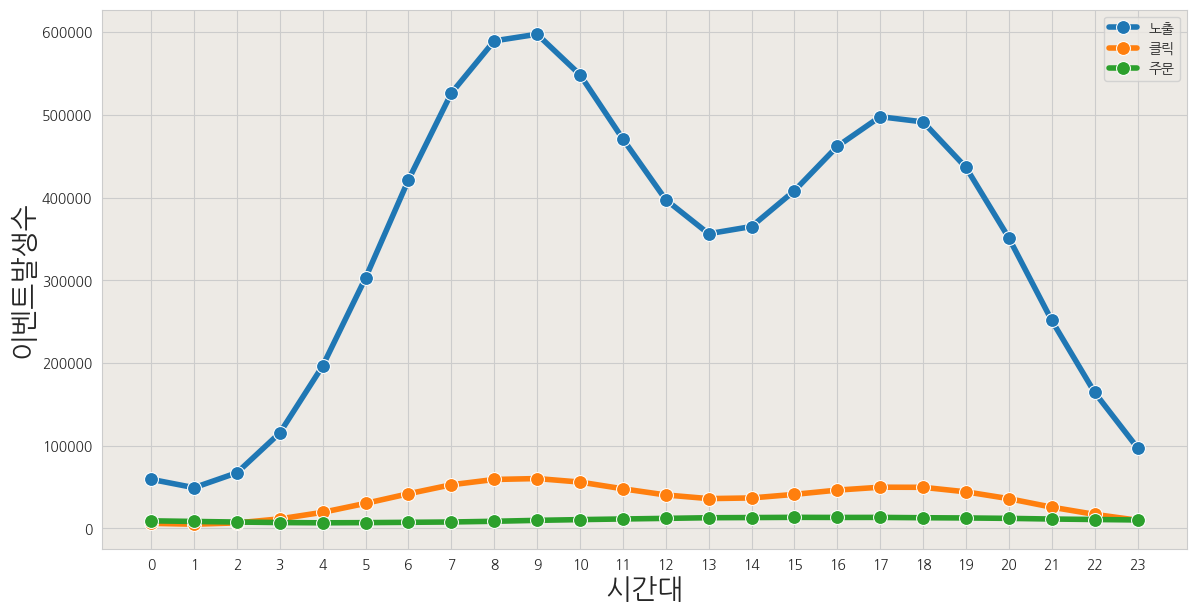

In [ ]:
# 시간대별 배너 노출, 클릭, 주문 라인 차트
plt.figure(figsize=(14, 7))  # 그래프 크기 설정

# 배너 노출 라인 차트
sns.lineplot(data=hour_summary, x='hour', y='Exposure', label='노출', marker='o', markersize=10, linewidth=4 )

# 배너 클릭 라인 차트
sns.lineplot(data=hour_summary, x='hour', y='click', label='클릭', marker='o', markersize=10, linewidth=4)

# 주문 라인 차트
sns.lineplot(data=hour_summary, x='hour', y='order', label='주문', marker='o', markersize=10, linewidth=4)

# 그래프 제목 및 레이블 설정
plt.xlabel('시간대', fontsize=20)
plt.ylabel('이벤트발생수', fontsize=20)
plt.legend() # 그래프 범례 추가
plt.xticks(range(0, 24, 1))  # x축 눈금 설정 (0부터 23까지)
plt.show()  # 그래프 표시

# 2.Analytics 분석

*  가설 : 내부 광고가 외부 광고보다 수익률이 높을 것이다
*  외부 광고 데이터는 없기 때문에 내부 데이터를 먼저 분석 진행

## 2-1 내부 광고 현황

### 2-1-1 배너 광고 제품별

In [ ]:
# 제품별 노출수, 클릭수, 주문수 일별로 집계
df3 = df.groupby(['date','product','title'])['user_id'].agg(['count'])
df3

count
date       product          title              
2019-01-01 accessories      banner_click    560
                            banner_show    5865
                            order           151
           clothes          banner_click    875
                            banner_show    5732
...                                         ...
2019-05-31 sneakers         banner_show    6894
                            order           287
           sports_nutrition banner_click    731
                            banner_show    7364
                            order           103

[2114 rows x 1 columns]

In [ ]:
# df3_show DF
df3_show = df3.loc[df3.index.get_level_values('title') == 'banner_show']
df3_show

count
date       product          title             
2019-01-01 accessories      banner_show   5865
           clothes          banner_show   5732
           company          banner_show   5749
           sneakers         banner_show   5871
           sports_nutrition banner_show   5776
...                                        ...
2019-05-31 accessories      banner_show   6674
           clothes          banner_show   7017
           company          banner_show   7075
           sneakers         banner_show   6894
           sports_nutrition banner_show   7364

[755 rows x 1 columns]

<Figure size 1200x600 with 0 Axes>

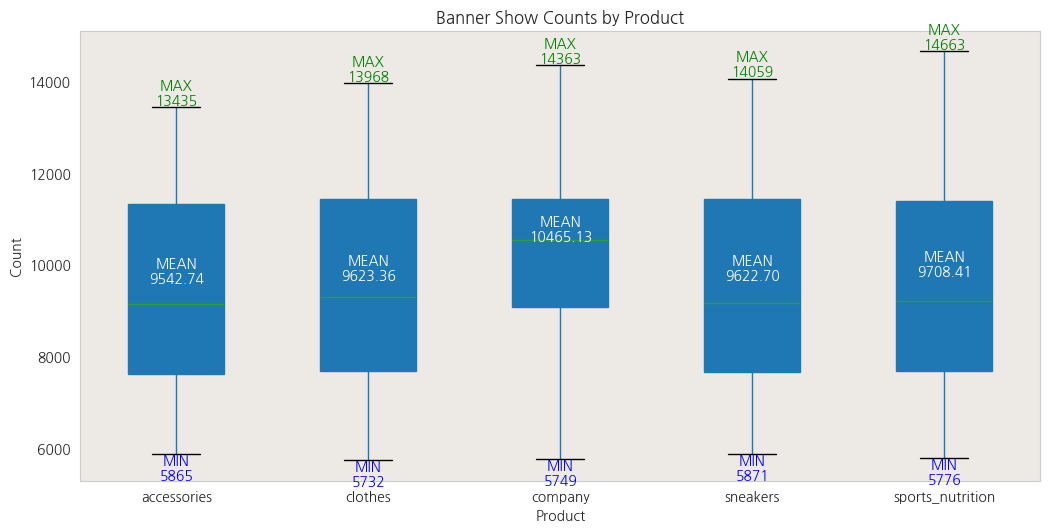

Statistics for Banner_show (Count):
                   min    max          mean
product                                    
accessories       5865  13435   9542.741722
clothes           5732  13968   9623.364238
company           5749  14363  10465.132450
sneakers          5871  14059   9622.695364
sports_nutrition  5776  14663   9708.410596


In [ ]:
# 1. Box plot을 그리기 위해 'product' 기준으로 그룹화된 데이터를 준비
plt.figure(figsize=(12, 6))

# 2. Box plot 그리기
box = df3_show.boxplot(column='count', by='product', grid=False, figsize=(12, 6), patch_artist=True)
plt.title('Banner Show Counts by Product')
plt.suptitle('')  # 상단 기본 제목 제거
plt.xlabel('Product')
plt.ylabel('Count')

# 3. MIN, MAX, MEAN 구하기
stats_df3_show = df3_show.groupby('product')['count'].agg(['min', 'max', 'mean'])

# 4. MIN, MAX, MEAN 값을 Box plot 위에 표시
for i, product in enumerate(stats_df3_show.index):
    min_val = stats_df3_show.loc[product, 'min']
    max_val = stats_df3_show.loc[product, 'max']
    mean_val = stats_df3_show.loc[product, 'mean']

    # Boxplot의 x축 위치와 값을 활용해 텍스트 표시
    plt.text(i + 1, min_val, f'MIN\n{min_val}', ha='center', va='top', fontsize=10, color='blue')
    plt.text(i + 1, max_val, f'MAX\n{max_val}', ha='center', va='bottom', fontsize=10, color='green')
    plt.text(i + 1, mean_val, f'MEAN\n{mean_val:.2f}', ha='center', va='bottom', fontsize=10, color='white')

plt.show()

# 5. 데이터 확인용 출력
print("Statistics for Banner_show (Count):")
print(stats_df3_show)


광고 노출 (Banner_show)  
Company : 평균 10,465회  
-> 가장 많은 노출 확보
Accessories, Clothes, Sneakers : 평균 9,500회~9,700회  
-> 균일하게 노출된것 확인

In [ ]:
# df3_click DF
df3_click = df3.loc[df3.index.get_level_values('title') == 'banner_click']
df3_click

count
date       product          title              
2019-01-01 accessories      banner_click    560
           clothes          banner_click    875
           company          banner_click    555
           sneakers         banner_click    718
           sports_nutrition banner_click    652
...                                         ...
2019-05-31 accessories      banner_click    682
           clothes          banner_click   1045
           company          banner_click    672
           sneakers         banner_click    868
           sports_nutrition banner_click    731

[755 rows x 1 columns]

<Figure size 1200x600 with 0 Axes>

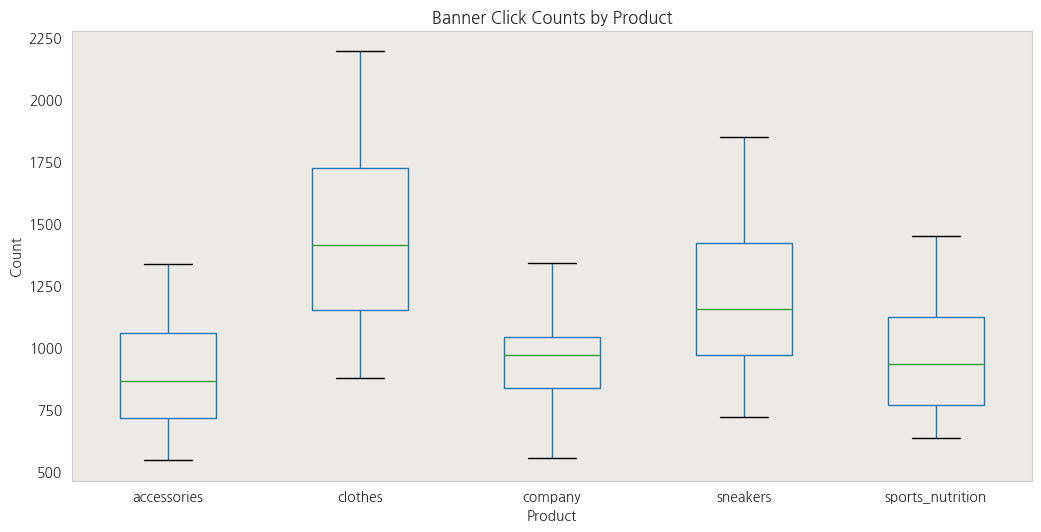

Statistics for Banner_click (Count):
                  min   max         mean
product                                 
accessories       545  1336   902.344371
clothes           875  2193  1460.894040
company           555  1340   959.079470
sneakers          718  1849  1209.245033
sports_nutrition  634  1450   959.721854


In [ ]:
# y축이 Count - Click Count
# 1. Box plot을 그리기 위해 'product' 기준으로 그룹화된 데이터를 준비
plt.figure(figsize=(12, 6))

# 2. Box plot 그리기
df3_click.boxplot(column='count', by='product', grid=False, figsize=(12, 6))
plt.title('Banner Click Counts by Product')
plt.suptitle('')  # 상단 기본 제목 제거
plt.xlabel('Product')
plt.ylabel('Count')

plt.show()

# 3. MIN, MAX, MEAN 구하기
stats_df3_click = df3_click.groupby('product')['count'].agg(['min','max','mean'])
print("Statistics for Banner_click (Count):")
print(stats_df3_click)

2) 광고 클릭 (Banner_click)  
Clothes : 평균 1,460회  
-> 높은 고객 관심도  

Company, Sports Nutrition : 평균 약 959회  
-> 상대적으로 관심을 덜 받고 있음  

Click-Through Rate(CTR, 클릭율) 계산 필요  

<Figure size 1200x600 with 0 Axes>

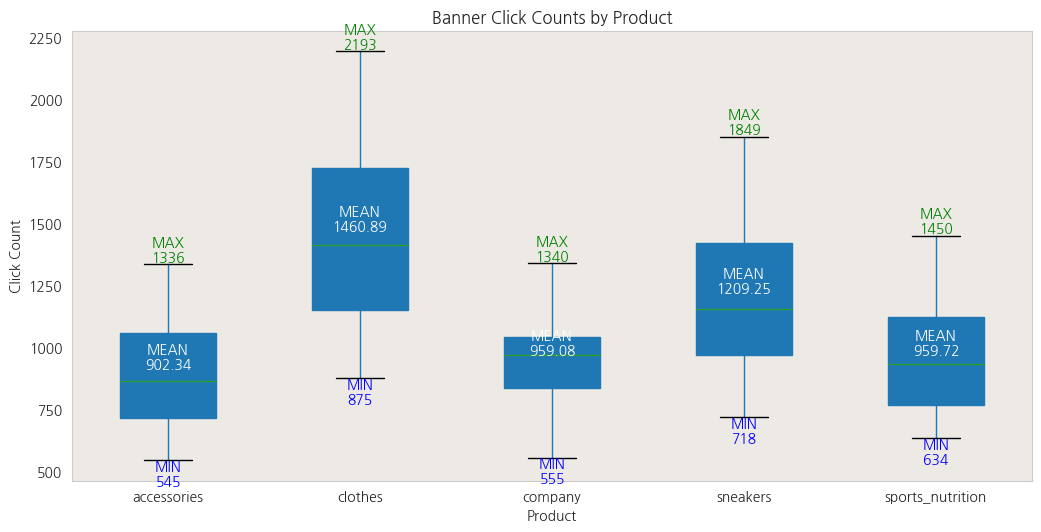

Statistics for Banner_click (Count):
                  min   max         mean
product                                 
accessories       545  1336   902.344371
clothes           875  2193  1460.894040
company           555  1340   959.079470
sneakers          718  1849  1209.245033
sports_nutrition  634  1450   959.721854


In [ ]:
# 1. Box plot 그리기
plt.figure(figsize=(12, 6))
box = df3_click.boxplot(column='count', by='product', grid=False, figsize=(12, 6), patch_artist=True)
plt.title('Banner Click Counts by Product')
plt.suptitle('')  # 상단 기본 제목 제거
plt.xlabel('Product')
plt.ylabel('Click Count')

# 2. MIN, MAX, MEAN 구하기
stats_df3_click = df3_click.groupby('product')['count'].agg(['min', 'max', 'mean'])

# 3. MIN, MAX, MEAN 값을 Box plot 위에 표시
for i, product in enumerate(stats_df3_click.index):
    min_val = stats_df3_click.loc[product, 'min']
    max_val = stats_df3_click.loc[product, 'max']
    mean_val = stats_df3_click.loc[product, 'mean']

    plt.text(i + 1, min_val, f'MIN\n{min_val}', ha='center', va='top', fontsize=10, color='blue')
    plt.text(i + 1, max_val, f'MAX\n{max_val}', ha='center', va='bottom', fontsize=10, color='green')
    plt.text(i + 1, mean_val, f'MEAN\n{mean_val:.2f}', ha='center', va='bottom', fontsize=10, color='white')

plt.show()

# 4. 데이터 확인용 출력
print("Statistics for Banner_click (Count):")
print(stats_df3_click)

3) 주문 (Order)  
Clothes :  평균 746.46건    
-> 가장 많은 주문 유도  

Company :  데이터 X  


Sports Nutrition : 평균 157.20건  
->  광고 효율성 떨어짐  

In [ ]:
# df3_order DF
df3_order = df3.loc[df3.index.get_level_values('title') == 'order']
df3_order

count
date       product          title       
2019-01-01 accessories      order    151
           clothes          order    350
           sneakers         order    200
           sports_nutrition order     77
2019-01-02 accessories      order    127
...                                  ...
2019-05-30 sports_nutrition order    109
2019-05-31 accessories      order    215
           clothes          order    466
           sneakers         order    287
           sports_nutrition order    103

[604 rows x 1 columns]

<Figure size 1200x600 with 0 Axes>

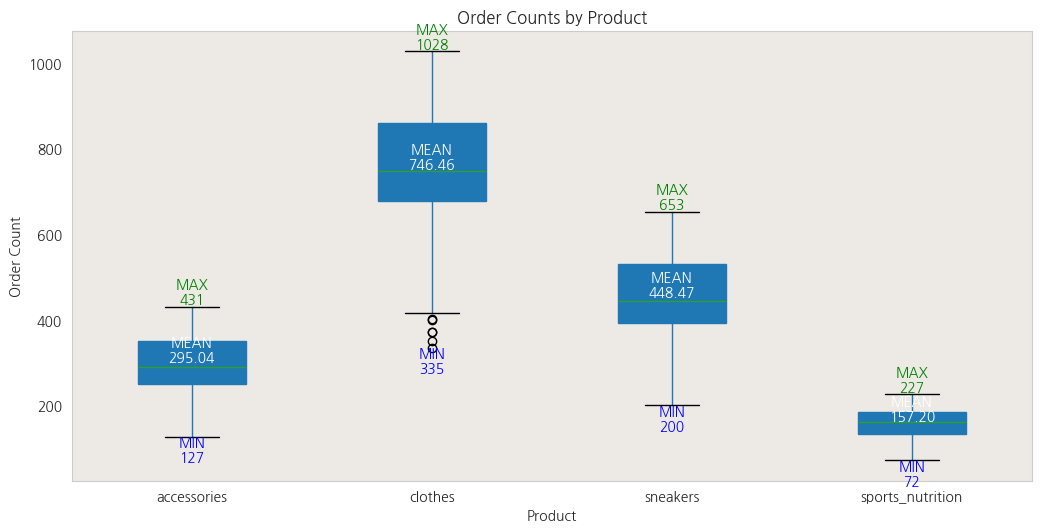

Statistics for Banner_order (Count):
                  min   max        mean
product                                
accessories       127   431  295.039735
clothes           335  1028  746.456954
sneakers          200   653  448.470199
sports_nutrition   72   227  157.198675


In [ ]:
# 1. Box plot 그리기
plt.figure(figsize=(12, 6))
box = df3_order.boxplot(column='count', by='product', grid=False, figsize=(12, 6), patch_artist=True)
plt.title('Order Counts by Product')
plt.suptitle('')  # 상단 기본 제목 제거
plt.xlabel('Product')
plt.ylabel('Order Count')

# 2. MIN, MAX, MEAN 구하기
stats_df3_order = df3_order.groupby('product')['count'].agg(['min', 'max', 'mean'])

# 3. MIN, MAX, MEAN 값을 Box plot 위에 표시
for i, product in enumerate(stats_df3_order.index):
    min_val = stats_df3_order.loc[product, 'min']
    max_val = stats_df3_order.loc[product, 'max']
    mean_val = stats_df3_order.loc[product, 'mean']

    plt.text(i + 1, min_val, f'MIN\n{min_val}', ha='center', va='top', fontsize=10, color='blue')
    plt.text(i + 1, max_val, f'MAX\n{max_val}', ha='center', va='bottom', fontsize=10, color='green')
    plt.text(i + 1, mean_val, f'MEAN\n{mean_val:.2f}', ha='center', va='bottom', fontsize=10, color='white')

plt.show()

# 4. 데이터 확인용 출력
print("Statistics for Banner_order (Count):")
print(stats_df3_order)


### 2-1-2 일별 배너별 CTR, CVR

In [ ]:
# event 변경
time_product_df = df.copy()
time_product_df['title'] = time_product_df['title'].apply(lambda x : x.replace('banner_' , ''))
time_product_df['product_title'] = time_product_df['product'] + ' ' + time_product_df['title']
time_product_df.head()

,order_id,user_id,page_id,product,site_version,time,title,target,date,weekday,hour,product_title
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,click,0,2019-01-11,Friday,9,sneakers click
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,show,0,2019-01-09,Wednesday,9,sneakers show
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,show,0,2019-01-09,Wednesday,9,sports_nutrition show
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,show,0,2019-01-03,Thursday,8,company show
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,click,0,2019-01-03,Thursday,8,company click


In [ ]:
# 시계열, 제품 배너 광고 행동 집계
pivot_time_df = time_product_df.groupby(['date', 'product_title'])['user_id'].count().reset_index().pivot_table(index='date', columns='product_title', values='user_id').fillna(0)
pivot_time_df.head()

product_title,accessories click,accessories order,accessories show,clothes click,clothes order,clothes show,company click,company show,sneakers click,sneakers order,sneakers show,sports_nutrition click,sports_nutrition order,sports_nutrition show
date,,,,,,,,,,,,,,
2019-01-01,560.0,151.0,5865.0,875.0,350.0,5732.0,555.0,5749.0,718.0,200.0,5871.0,652.0,77.0,5776.0
2019-01-02,545.0,127.0,6197.0,961.0,335.0,6359.0,574.0,6234.0,812.0,216.0,6263.0,646.0,72.0,6285.0
2019-01-03,599.0,130.0,6722.0,1045.0,372.0,6811.0,625.0,6610.0,836.0,219.0,6662.0,709.0,91.0,6771.0
2019-01-04,688.0,141.0,7118.0,1129.0,402.0,7203.0,646.0,7077.0,863.0,225.0,7075.0,734.0,84.0,7229.0
2019-01-05,710.0,164.0,7602.0,1149.0,371.0,7464.0,667.0,7445.0,986.0,256.0,7592.0,753.0,72.0,7520.0


In [ ]:
# CTR, CVR 계산
for col in df['product'].unique():
  try:
    pivot_time_df[f'{col} CTR'] = round(pivot_time_df[f'{col} click'] / pivot_time_df[f'{col} show'] * 100, 2)
    pivot_time_df[f'{col} CVR'] = round(pivot_time_df[f'{col} order'] / pivot_time_df[f'{col} click'] * 100, 2)

  except:
    pass

In [ ]:
# 'CTR'과 'CVR' 관련 열만 선택
ctr_columns = [col for col in pivot_time_df.columns if 'CTR' in col]
ctr_df = pivot_time_df[ctr_columns]

ctr_df.head()

product_title,sneakers CTR,sports_nutrition CTR,company CTR,accessories CTR,clothes CTR
date,,,,,
2019-01-01,12.23,11.29,9.65,9.55,15.27
2019-01-02,12.97,10.28,9.21,8.79,15.11
2019-01-03,12.55,10.47,9.46,8.91,15.34
2019-01-04,12.20,10.15,9.13,9.67,15.67
2019-01-05,12.99,10.01,8.96,9.34,15.39


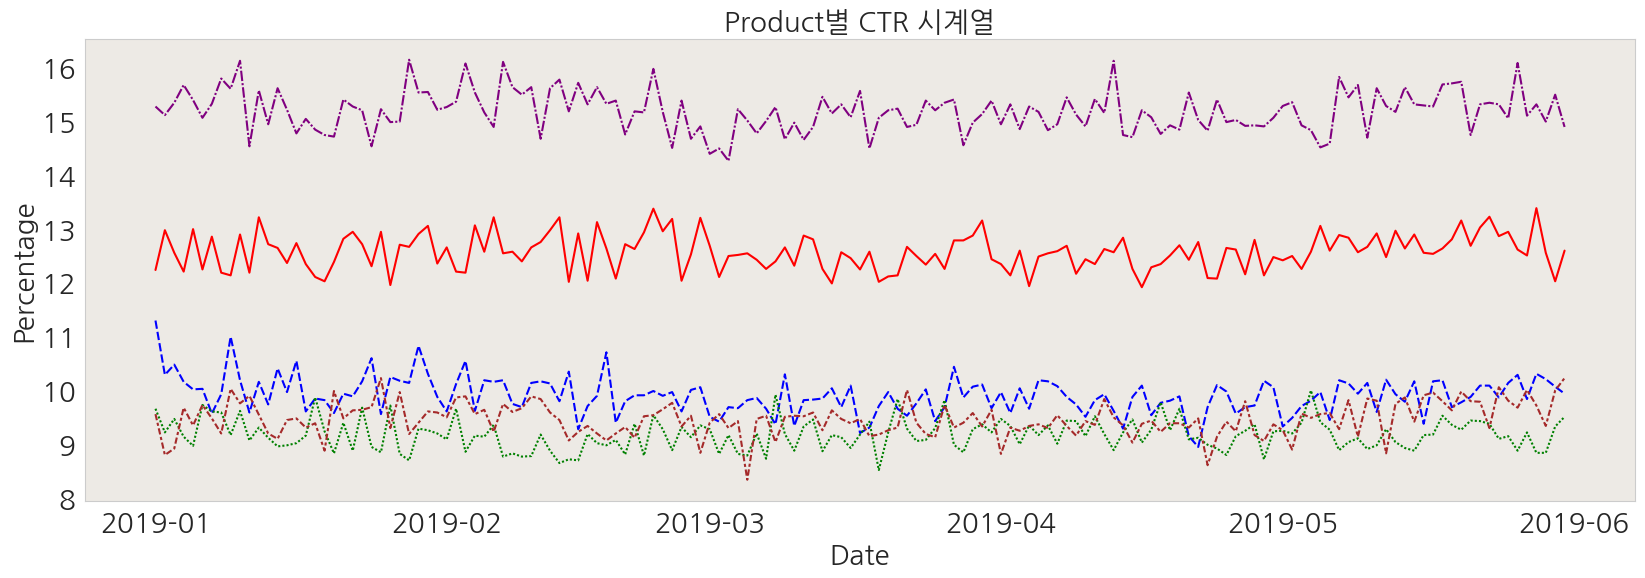

In [ ]:
# 선 그래프 그리기
plt.figure(figsize=(20, 6))
sns.lineplot(data=ctr_df, palette=["red", "blue", "green", "brown", "purple"])

# 그래프 제목과 레이블 추가
plt.title('Product별 CTR 시계열', fontsize=20)  # 제목 폰트 크기
plt.xlabel('Date', fontsize=20)  # x축 레이블 폰트 크기
plt.ylabel('Percentage', fontsize=20)  # y축 레이블 폰트 크기

# x축과 y축 폰트 크기 설정
plt.xticks(rotation=0, fontsize=20)  # x축 값 폰트 크기
plt.yticks(fontsize=20)  # y축 값 폰트 크기
plt.grid(False)
plt.gca().get_legend().remove()

# 그래프 표시
plt.show()

In [ ]:
# 'CTR'과 'CVR' 관련 열만 선택
cvr_columns = [col for col in pivot_time_df.columns if 'CVR' in col]
cvr_df = pivot_time_df[cvr_columns]
cvr_df.head()

product_title,sneakers CVR,sports_nutrition CVR,accessories CVR,clothes CVR
date,,,,
2019-01-01,27.86,11.81,26.96,40.00
2019-01-02,26.60,11.15,23.30,34.86
2019-01-03,26.20,12.83,21.70,35.60
2019-01-04,26.07,11.44,20.49,35.61
2019-01-05,25.96,9.56,23.10,32.29


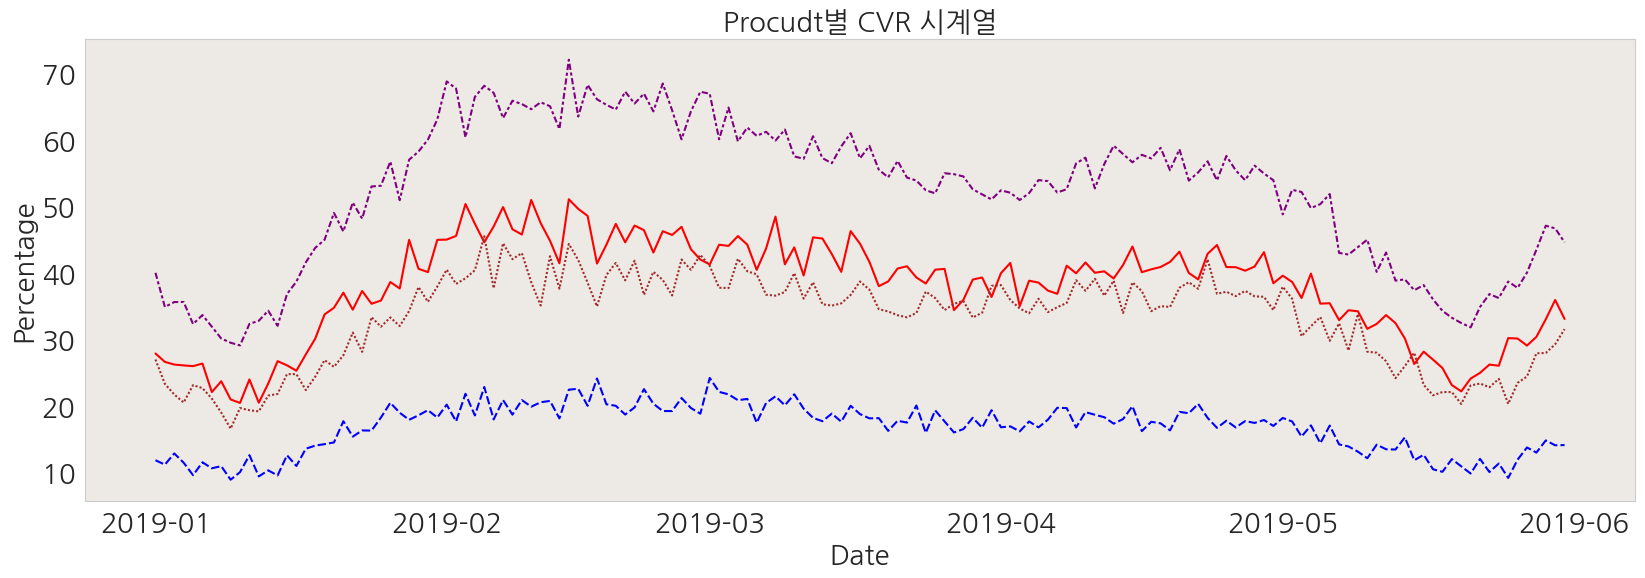

In [ ]:
# 선 그래프 그리기
plt.figure(figsize=(20, 6))
sns.lineplot(data=cvr_df, palette=["red", "blue", "brown", "purple"])

# 그래프 제목과 레이블 추가
plt.title('Procudt별 CVR 시계열', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Percentage', fontsize=20)

# x축 날짜 형식 지정
# x축과 y축 폰트 크기 설정
plt.xticks(rotation=0, fontsize=20)  # x축 값 폰트 크기
plt.yticks(fontsize=20)  # y축 값 폰트 크기
plt.grid(False)
plt.gca().get_legend().remove()

# 그래프 표시
plt.show()

### 2-1-3 월별 내부 광고 CPC, CTR

In [ ]:
# company 제외한 데이터만 필터링
df_filtered = df[df['product'] != 'company']

monthly_stats = pd.DataFrame({
   # 배너를 본 유저 수
   'banner_show': df_filtered[df_filtered['title'] == 'banner_show'].groupby('month')['user_id'].nunique(),

   # 배너를 보고 클릭한 유저 수 (배너 노출이 있는 유저 중)
   'banner_click': df_filtered[
       (df_filtered['title'] == 'banner_click') &
       (df_filtered['user_id'].isin(df_filtered[df_filtered['title'] == 'banner_show']['user_id']))
   ].groupby('month')['user_id'].nunique(),

   # 배너를 보고, 클릭하고, 주문한 유저 수
   'order': df_filtered[
       (df_filtered['target'] == 1) &
       (df_filtered['user_id'].isin(df_filtered[df_filtered['title'] == 'banner_click']['user_id'])) &
       (df_filtered['user_id'].isin(df_filtered[df_filtered['title'] == 'banner_show']['user_id']))
   ].groupby('month')['user_id'].nunique()
})

# CTR과 CVR 계산
monthly_stats['CTR'] = (monthly_stats['banner_click'] / monthly_stats['banner_show'] * 100).round(2)
monthly_stats['CVR'] = (monthly_stats['order'] / monthly_stats['banner_click'] * 100).round(2)

# CTR, CVR 전월대비 계산
monthly_stats['CTR_MoM'] = (monthly_stats['CTR'].pct_change() * 100).round(2)
monthly_stats['CVR_MoM'] = (monthly_stats['CVR'].pct_change() * 100).round(2)

# 결과
print(monthly_stats.sort_index())

       banner_show  banner_click  order    CTR    CVR  CTR_MoM  CVR_MoM
month                                                                  
1           708606        111603  12989  15.75  11.64      NaN      NaN
2           609434         90592  15945  14.86  17.60    -5.65    51.20
3           840886        126248  20494  15.01  16.23     1.01    -7.78
4           989185        149898  24374  15.15  16.26     0.93     0.18
5          1024781        164224  20296  16.03  12.36     5.81   -23.99


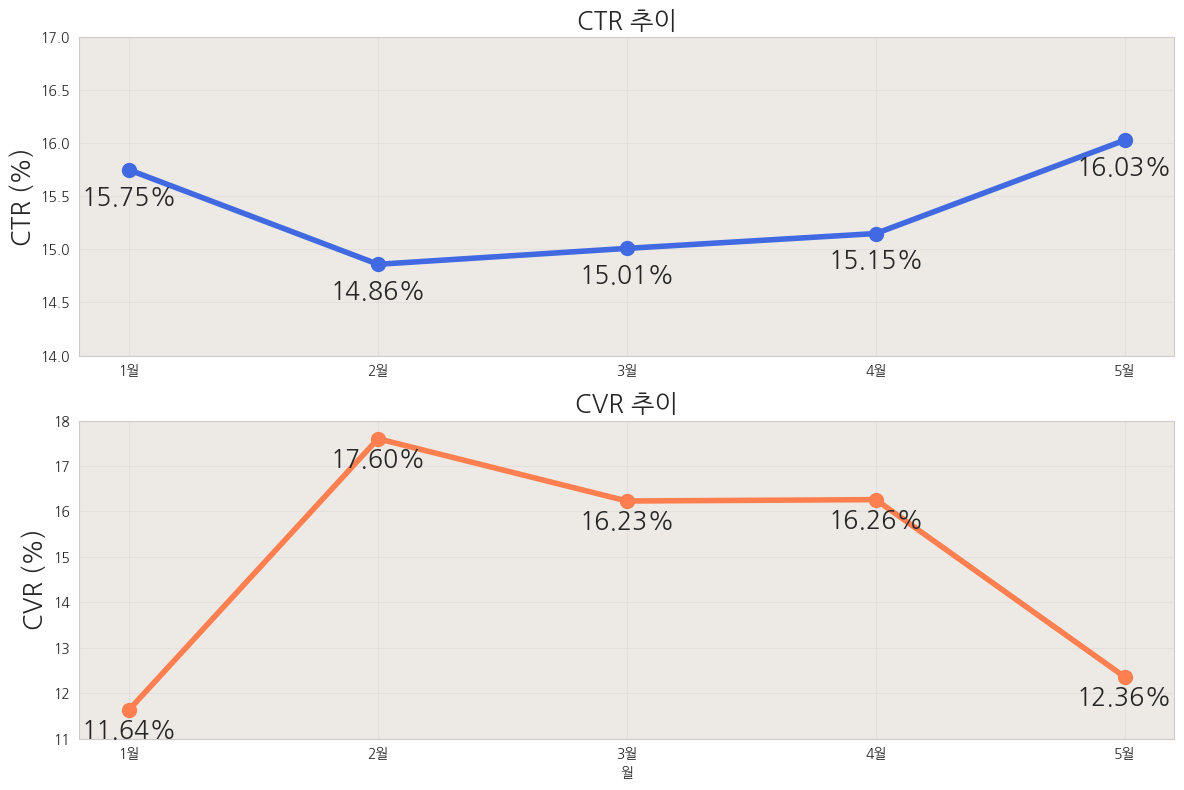

In [ ]:
# 2개의 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# CTR 그래프
ax1.plot(range(5), [15.75, 14.86, 15.01, 15.15, 16.03], '-o', color='royalblue', linewidth=4, markersize=10)
ax1.set_title('CTR 추이', fontsize=18)  # 제목 폰트 크기 증가
ax1.set_ylabel('CTR (%)', fontsize=18)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(5))
ax1.set_xticklabels([f'{x}월' for x in range(1, 6)])
ax1.set_ylim(14, 17)

# CTR 값 표시
ctr_values = [15.75, 14.86, 15.01, 15.15, 16.03]
for i, v in enumerate(ctr_values):
   ax1.text(i, v - 0.15, f'{v:.2f}%', ha='center', va='top', fontsize=18)  # 값 표시 위치 변경

# CVR 그래프
ax2.plot(range(5), [11.64, 17.60, 16.23, 16.26, 12.36], '-o', color='coral', linewidth=4, markersize=10)
ax2.set_title('CVR 추이', fontsize=18)  # 제목 폰트 크기 증가
ax2.set_ylabel('CVR (%)', fontsize=18)
ax2.set_xlabel('월')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(5))
ax2.set_xticklabels([f'{x}월' for x in range(1, 6)])
ax2.set_ylim(11, 18)

# CVR 값 표시
cvr_values = [11.64, 17.60, 16.23, 16.26, 12.36]
for i, v in enumerate(cvr_values):
   ax2.text(i, v - 0.2, f'{v:.2f}%', ha='center', va='top', fontsize=18)  # 값 표시 위치 변경

plt.tight_layout()
plt.show()

### 2-1-4 기기별 내부 광고 현황

In [ ]:
device_product_funnel = df.groupby(['user_id', 'product', 'site_version']).agg({'title' : list}).reset_index()

In [ ]:
# title 열의 이벤트를 새 열로 확장
event_columns = pd.get_dummies(device_product_funnel['title'].explode()).groupby(level=0).sum()
event_df = pd.concat([device_product_funnel, event_columns], axis=1)

In [ ]:
# 배너 관련 show, order만
event_df.loc[(event_df['banner_click'] == 1) & (event_df['banner_show'] == 0), 'banner_show'] = 1
event_df.loc[(event_df['order'] == 1) & (event_df['banner_click'] == 0), 'order'] = 0

In [ ]:
# product별, 기기별 집계
device_product_funnel_df = event_df.groupby(['product', 'site_version']).agg({'banner_show' : 'sum', 'banner_click' : 'sum', 'order' : 'sum'}).reset_index()
device_product_funnel_df

,product,site_version,banner_show,banner_click,order
0,accessories,desktop,410003,18531,1786
1,accessories,mobile,1030951,117723,3148
2,clothes,desktop,418070,32781,8663
3,clothes,mobile,1035058,187814,8800
4,company,desktop,477374,28464,0
5,company,mobile,1102861,116357,0
6,sneakers,desktop,411598,21419,3014
7,sneakers,mobile,1041430,161177,6071
8,sports_nutrition,desktop,417595,13870,745
9,sports_nutrition,mobile,1048375,131048,1763


In [ ]:
# 지표 계산
device_product_funnel_df['CTR'] = device_product_funnel_df['banner_click'] /  device_product_funnel_df['banner_show'] * 100
device_product_funnel_df['CVR'] = device_product_funnel_df['order'] /  device_product_funnel_df['banner_click'] * 100

In [ ]:
device_product_funnel_df

,product,site_version,banner_show,banner_click,order,CTR,CVR
0,accessories,desktop,410003,18531,1786,4.519723,9.637904
1,accessories,mobile,1030951,117723,3148,11.418874,2.674074
2,clothes,desktop,418070,32781,8663,7.841031,26.426894
3,clothes,mobile,1035058,187814,8800,18.145263,4.685487
4,company,desktop,477374,28464,0,5.962621,0.000000
5,company,mobile,1102861,116357,0,10.550468,0.000000
6,sneakers,desktop,411598,21419,3014,5.203864,14.071619
7,sneakers,mobile,1041430,161177,6071,15.476508,3.766666
8,sports_nutrition,desktop,417595,13870,745,3.321400,5.371305
9,sports_nutrition,mobile,1048375,131048,1763,12.500107,1.345309


In [ ]:
device_product_funnel_df.pivot_table(index='product', columns='site_version',
                                     values=['banner_show', 'banner_click', 'order', 'CTR', 'CVR'], aggfunc='sum')

CTR                   CVR           banner_click  \
site_version       desktop     mobile    desktop    mobile      desktop   
product                                                                   
accessories       4.519723  11.418874   9.637904  2.674074        18531   
clothes           7.841031  18.145263  26.426894  4.685487        32781   
company           5.962621  10.550468   0.000000  0.000000        28464   
sneakers          5.203864  15.476508  14.071619  3.766666        21419   
sports_nutrition  3.321400  12.500107   5.371305  1.345309        13870   

                         banner_show            order         
site_version      mobile     desktop   mobile desktop mobile  
product                                                       
accessories       117723      410003  1030951    1786   3148  
clothes           187814      418070  1035058    8663   8800  
company           116357      477374  1102861       0      0  
sneakers          161177      411598  1041430    3014   6071  
sports_nutrition  131048      417595  1048375     745   1763

## 2-2 고객 세그먼트별 요약

### 2-2-1 고객 행동 패턴 세그먼트 분류

*   광고를 많이 본 유저 관점





In [ ]:
funnel_df = df.pivot_table(index = 'user_id', columns = 'title', values = 'page_id', aggfunc='count') \
                            .fillna(0)[['banner_show', 'banner_click', 'order']]
funnel_df.head()

title,banner_show,banner_click,order
user_id,,,
0000023f507999464aa2b78875b7e5d6,1.0,0.0,0.0
000009891526c0ade7180f8423792063,1.0,0.0,0.0
00000ce845c00cbf0686c992fc369df4,1.0,0.0,0.0
00000f7264c27ba6fea0c837ed6aa0aa,1.0,0.0,0.0
0000104cd168386a335ba6bf6e32219d,2.0,1.0,1.0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 배너 노출, 클릭, 주문 데이터
funnel_df = pd.DataFrame({
    'banner_show': funnel_df['banner_show'],
    'banner_click': funnel_df['banner_click'],
    'order': funnel_df['order']
})

# 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(funnel_df)

# K-평균 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
funnel_df['segment'] = kmeans.fit_predict(scaled_data)

# 세그먼트 확인
funnel_df.head()

,banner_show,banner_click,order,segment
user_id,,,,
0000023f507999464aa2b78875b7e5d6,1.0,0.0,0.0,3
000009891526c0ade7180f8423792063,1.0,0.0,0.0,3
00000ce845c00cbf0686c992fc369df4,1.0,0.0,0.0,3
00000f7264c27ba6fea0c837ed6aa0aa,1.0,0.0,0.0,3
0000104cd168386a335ba6bf6e32219d,2.0,1.0,1.0,2


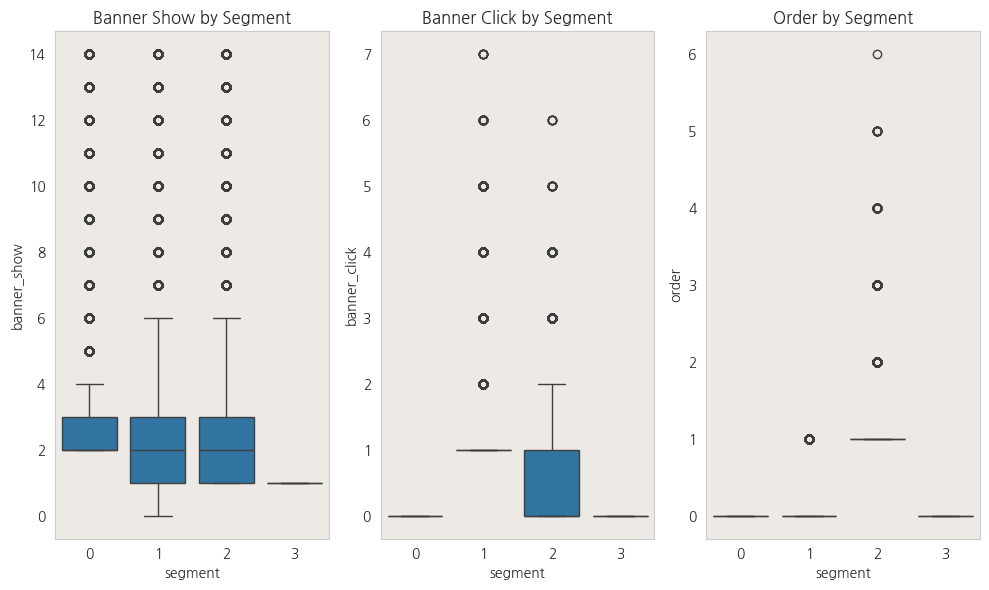

In [ ]:
# 플롯 크기
plt.figure(figsize=(10, 6))

# 'banner_show' 박스 플롯
plt.subplot(1, 3, 1)
sns.boxplot(x='segment', y='banner_show', data=funnel_df)
plt.title('Banner Show by Segment')
plt.grid(False)  # 격자 제거

# 'banner_click' 박스 플롯
plt.subplot(1, 3, 2)
sns.boxplot(x='segment', y='banner_click', data=funnel_df)
plt.title('Banner Click by Segment')
plt.grid(False)  # 격자 제거

# 'order' 박스 플롯
plt.subplot(1, 3, 3)
sns.boxplot(x='segment', y='order', data=funnel_df)
plt.title('Order by Segment')
plt.grid(False)  # 격자 제거

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
# 세그먼트 이름 정의
funnel_df['segment_name'] = funnel_df['segment'].map(
    {0 : 'Passive Viewers', 1 : 'Click Explorers', 2 : 'Engaged Buyers', 3 : 'Inactive Viewers'})

<Axes: ylabel='count'>

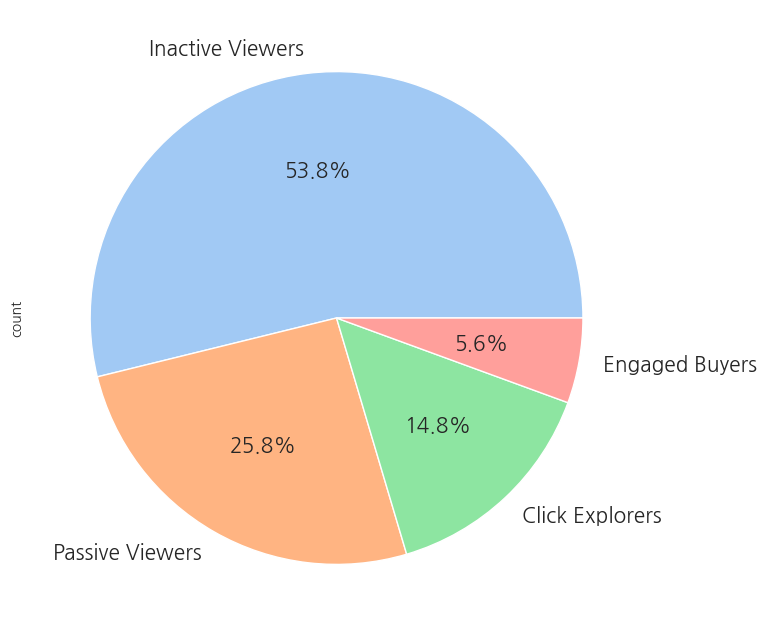

In [ ]:
# 세그먼트 비율 파이차트
plt.figure(figsize=(8, 8))
plt.gca().set_facecolor('#edeae5')  # 배경색 설정
# 원형 차트 그리기
funnel_df['segment_name'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),  # 부드러운 색상
    textprops={'fontsize': 15}  # 텍스트 크기
)

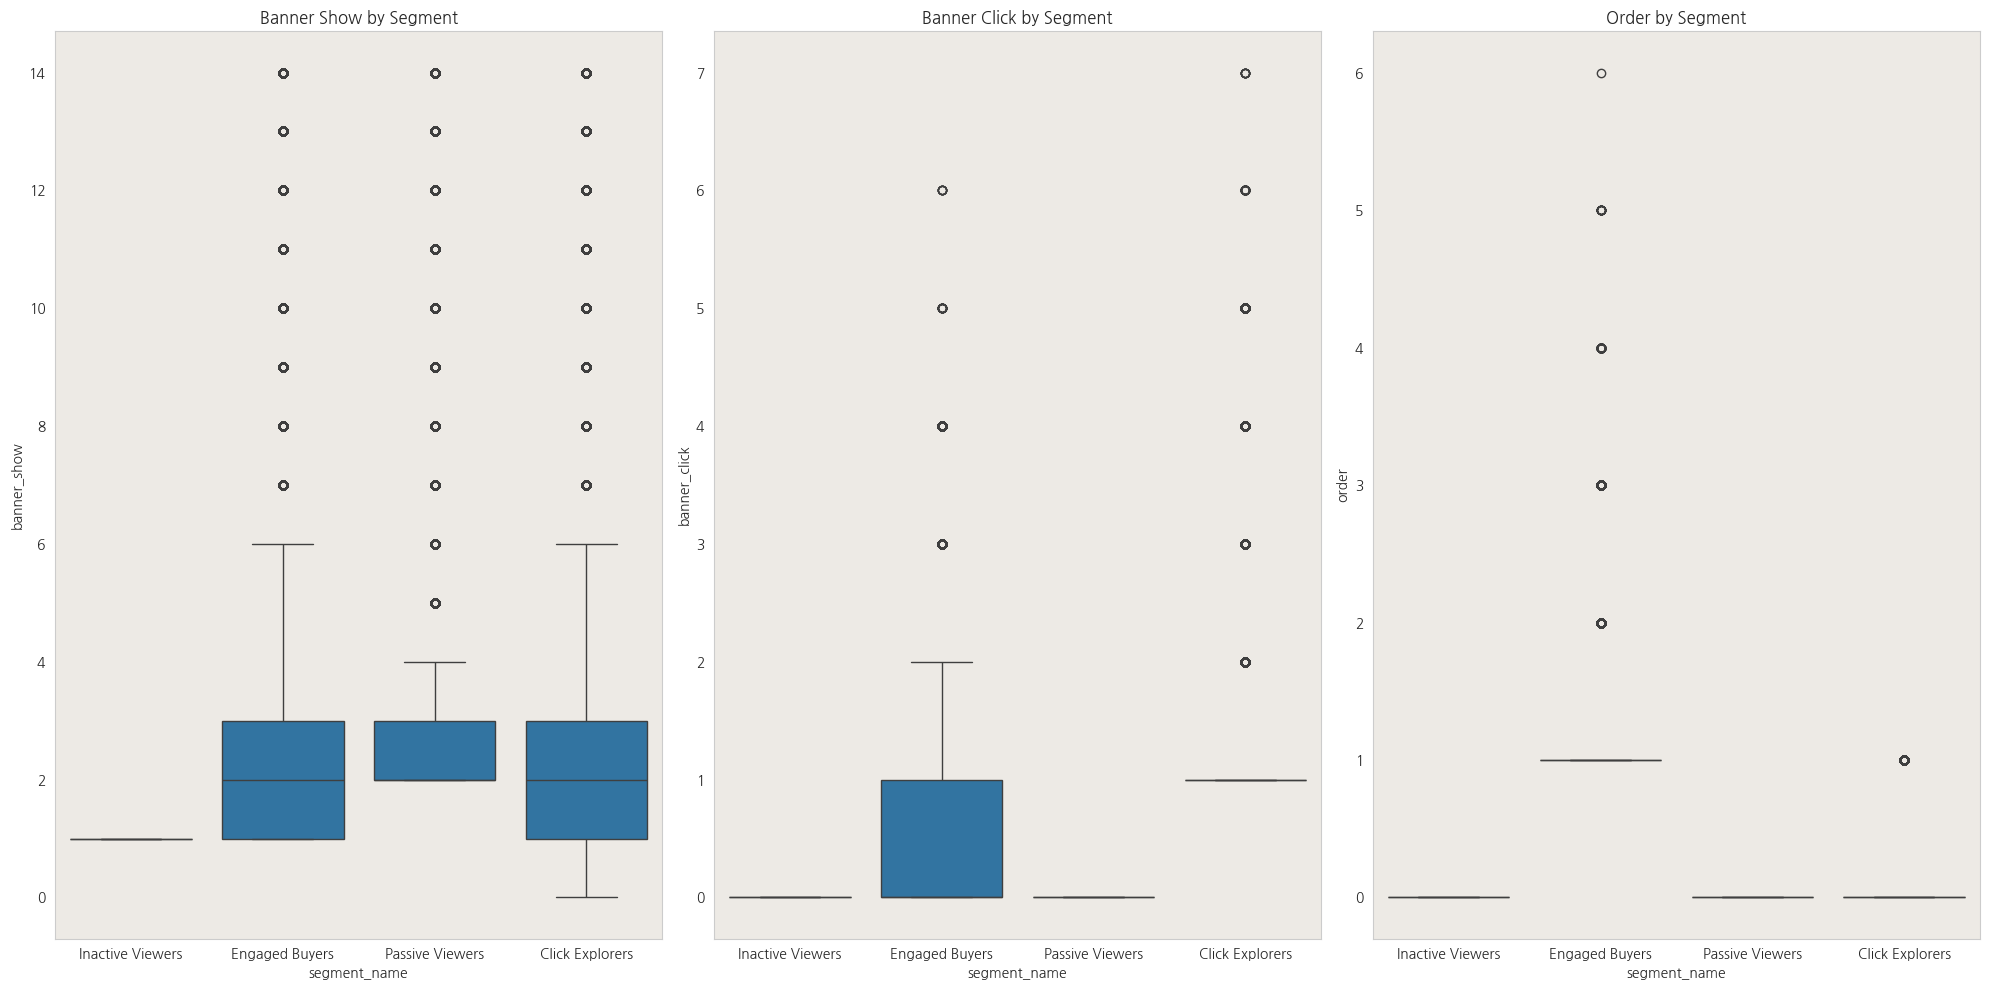

In [ ]:
# 플롯 크기
plt.figure(figsize=(20, 10))

# 'banner_show' 박스 플롯
plt.subplot(1, 3, 1)
sns.boxplot(x='segment_name', y='banner_show', data=funnel_df)
plt.title('Banner Show by Segment')
plt.grid(False)  # 격자 제거

# 'banner_click' 박스 플롯
plt.subplot(1, 3, 2)
sns.boxplot(x='segment_name', y='banner_click', data=funnel_df)
plt.title('Banner Click by Segment')
plt.grid(False)  # 격자 제거

# 'order' 박스 플롯
plt.subplot(1, 3, 3)
sns.boxplot(x='segment_name', y='order', data=funnel_df)
plt.title('Order by Segment')
plt.grid(False)  # 격자 제거

# 레이아웃 조정
plt.tight_layout()
plt.show()



*  Passive Viewer (주문은 하지 않는 뷰어)  
배너 노출만 있고 클릭과 주문이 전혀 없는 그룹. 광고의 효과가 없거나 잘못된 타겟팅으로 해석될 수 있습니다. 이 그룹에 대한 주요 전략은 배너 메시지를 변경하거나, 타겟팅 기준을 재검토하여 더 적합한 사용자에게 도달하는 것입니다.

*   Click Explorers  (클릭 탐색자)    
배너 클릭이 있지만, 전환은 거의 없는 그룹. 클릭 후 후속 조치(리타겟팅 등)가 필요합니다. 이 그룹에게는 클릭 후 구매를 유도할 수 있는 추가적인 혜택 제공이나, 고객 경험을 개선하는 전략이 필요합니다.  

*   Engaged Buyers (적극적인 구매자)  
배너 클릭 후 전환이 이루어지는 그룹. 효과적인 타겟 그룹으로, 전환율을 높이는 추가 전략이 유효할 수 있습니다. 예를 들어, 재구매를 유도하는 프로모션이나 충성도 프로그램을 통해 이 그룹과의 관계를 강화할 수 있습니다.  

* Inactive Viewer (참여 하지 않는 뷰어)    
배너 노출이 적고 클릭 및 주문이 전혀 없는 그룹. 이 그룹은 마케팅의 영향을 받지 않거나 관심이 없는 사용자들입니다. 이 그룹에 대해서는 추가적인 광고 노출을 통해 관심을 끌거나, 완전히 배제하여 예산을 다른 세그먼트에 집중하는 전략이 고려될 수 있습니다.

### 2-2-2 RFM 세그먼트

*  주문을 많이 하는 유저 관점

In [ ]:
# 주문 데이터만 필터링
orders = df[df['title'] == 'order']

# 마지막 날 + 1
analysis_date = orders['time'].max() + pd.Timedelta(days=1)

# Recency, Frequency 계산
rfm = orders.groupby('user_id').agg({
    'time': lambda x: (analysis_date - x.max()).days,  # Recency
    'page_id': 'count'  # Frequency
}).reset_index()

# Rename columns
rfm.columns = ['user_id', 'Recency', 'Frequency']

<Axes: >

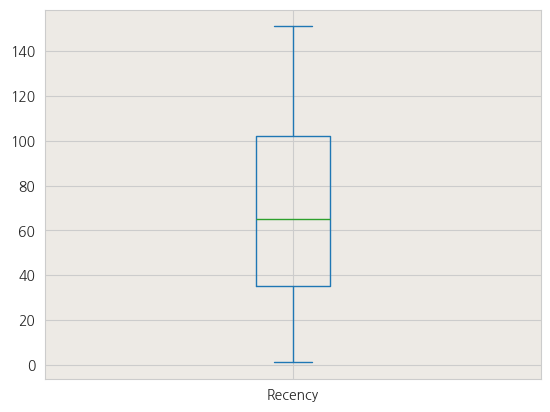

In [ ]:
# Recency 박스플랏
rfm['Recency'].plot(kind='box')

In [ ]:
# Recency 통계
rfm['Recency'].describe()

,Recency
count,237866.000000
mean,69.210690
std,40.304345
min,1.000000
25%,35.000000
50%,65.000000
75%,102.000000
max,151.000000


In [ ]:
# Frequency
rfm['Frequency'].value_counts()

,count
Frequency,
1,227865
2,9250
3,666
4,67
5,17
6,1


In [ ]:
# 분위수 확인
quintiles = rfm[['Recency', 'Frequency']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 30.0, 0.4: 53.0, 0.6: 79.0, 0.8: 111.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0}}

In [ ]:
# R 계산 - 분위수로
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

In [ ]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))

In [ ]:
# Frequency를 3개의 그룹으로 나누기
def classify_frequency(frequency):
    if frequency == 1:
        return 1
    elif 2 <= frequency <= 4:
        return 2
    else:
        return 3

In [ ]:
rfm['F'] = rfm['Frequency'].apply(classify_frequency)

In [ ]:
rfm.head()

,user_id,Recency,Frequency,R,F
0,0000104cd168386a335ba6bf6e32219d,50,1,4,1
1,00005c2d819c584e32298f8729c4b1d7,60,1,3,1
2,0000c0bdc0f15bd239cfffa884791a10,18,1,5,1
3,000112b726022eb7e0b4668544e19220,74,1,3,1
4,0001181bf1ad8f82dcf59c7c18343bd5,95,1,2,1


In [ ]:
# RF 스코어 계산
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)

In [ ]:
segt_map = {
    r'[1-2][1]': 'hibernating',         # R=1~2, F=1
    r'[2-4][1]': 'at risk',             # R=2~4, F=1
    r'[1-5][2-3]': 'champions',         # R=1~5, F=2~3
    r'[5][1]' : 'new explorer'          # R = 5, F = 1
}

rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

In [ ]:
rfm.head()

,user_id,Recency,Frequency,R,F,Segment
0,0000104cd168386a335ba6bf6e32219d,50,1,4,1,at risk
1,00005c2d819c584e32298f8729c4b1d7,60,1,3,1,at risk
2,0000c0bdc0f15bd239cfffa884791a10,18,1,5,1,new explorer
3,000112b726022eb7e0b4668544e19220,74,1,3,1,at risk
4,0001181bf1ad8f82dcf59c7c18343bd5,95,1,2,1,hibernating


In [ ]:
# 각 세그먼트별 고객 수 계산
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

In [ ]:
segment_counts

,Segment,Count
0,hibernating,92002
1,at risk,89578
2,new explorer,46285
3,champions,10001


In [ ]:
# 트리 차트용 데이터 준비
labels = segment_counts['Segment'].tolist()
parents = [''] * len(labels)  # 부모 노드를 모두 루트로 설정
values = segment_counts['Count'].tolist()

# 각 세그먼트별 색상 지정 (색상은 임의로 지정)
color_map = {
    'hibernating': 'skyblue',
    'at risk': 'blue',
    'new explorer' : 'darkblue',
    'champions': 'darkgreen'
}

# 색상 리스트 생성
colors = [color_map.get(segment, 'gray') for segment in labels]

# 트리 차트 그리기
fig = go.Figure(go.Treemap(
    labels=labels,
    parents=parents,
    values=values,
    textinfo="label+value",  # 라벨과 값을 표시
    textfont=dict(size=35, family="Arial", color="white"),  # 글자 크기, 폰트, 색상 설정
    textposition="middle center",  # 텍스트 가운데 정렬
    marker=dict(
        colors=colors,  # 세그먼트별 색상 리스트 사용
        showscale=False  # 색상 스케일 표시 안 함
    )
))

# 차트 출력
fig.show()

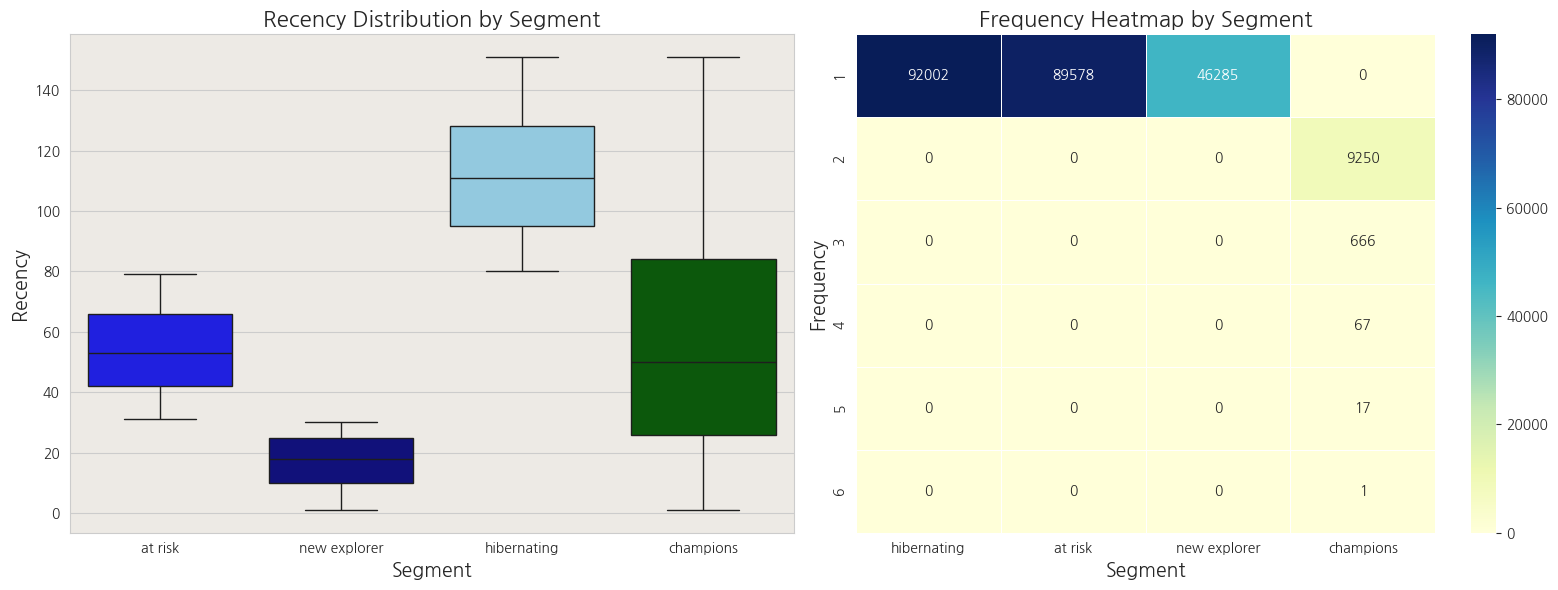

In [ ]:
# Frequency-Segment 교차 테이블 생성
cross_tab = rfm.groupby(['Frequency', 'Segment']).size().unstack(fill_value=0)

# 세그먼트 순서 지정
desired_order = ['hibernating', 'at risk', 'new explorer','champions']
cross_tab = cross_tab[desired_order]  # 열 순서 재배열

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1행, 2열 격자 배치

# 세그먼트별 색상 매핑
segment_colors = {
    'hibernating': 'skyblue',
    'at risk': 'blue',
    'new explorer': 'darkblue',
    'champions': 'darkgreen'
}

# Recency 박스 플롯
sns.boxplot(
    data=rfm,
    x='Segment',
    y='Recency',
    palette=segment_colors,  # 색상 매핑 적용
    ax=axes[0]
)
axes[0].set_title('Recency Distribution by Segment', fontsize=16)
axes[0].set_xlabel('Segment', fontsize=14)
axes[0].set_ylabel('Recency', fontsize=14)
axes[0].tick_params(axis='x', rotation=0)

# 히트맵
sns.heatmap(
    cross_tab,
    annot=True,  # 각 셀에 값 표시
    fmt="d",  # 정수 포맷
    cmap="YlGnBu",  # 색상 팔레트
    linewidths=.5,  # 셀 경계선
    cbar=True,  # 색상 막대 표시
    ax=axes[1]  # 히트맵을 두 번째 축에 추가
)

axes[1].set_title('Frequency Heatmap by Segment', fontsize=16)
axes[1].set_xlabel('Segment', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)

# 전체 레이아웃 조정
plt.tight_layout()

# 차트 출력
plt.show()

## 3.내부 & 외부 광고 비교 분석 (6개월)

In [ ]:
product_event_funnel

,user_id,product,title,banner_click,banner_show,order
0,0000023f507999464aa2b78875b7e5d6,accessories,[banner_show],0,1,0
1,000009891526c0ade7180f8423792063,sneakers,[banner_show],0,1,0
2,00000ce845c00cbf0686c992fc369df4,clothes,[banner_show],0,1,0
3,00000f7264c27ba6fea0c837ed6aa0aa,sneakers,[banner_show],0,1,0
4,0000104cd168386a335ba6bf6e32219d,accessories,[banner_show],0,1,0
...,...,...,...,...,...,...
6072138,fffff9055756ed29a5aa13ee8e222ac8,company,"[banner_show, banner_click]",1,1,0
6072139,fffffa6bed6b7780465149fab05cf406,clothes,[banner_show],0,1,0
6072140,fffffa6bed6b7780465149fab05cf406,company,[banner_show],0,1,0
6072141,fffffa6bed6b7780465149fab05cf406,sneakers,[banner_show],0,1,0


In [ ]:
product_event_funnel_df = product_event_funnel.groupby(['product']).agg({'banner_show' : 'sum', 'banner_click' : 'sum', 'order' : 'sum'}).reset_index()
product_event_funnel_df

,product,banner_show,banner_click,order
0,accessories,1440954,136254,4977
1,clothes,1453128,220595,17558
2,company,1580235,144821,0
3,sneakers,1453028,182596,9137
4,sports_nutrition,1465970,144918,2525


In [ ]:
# 지표 계산
product_event_funnel_df['CTR'] = product_event_funnel_df['banner_click'] /  product_event_funnel_df['banner_show'] * 100
product_event_funnel_df['CVR'] = product_event_funnel_df['order'] /  product_event_funnel_df['banner_click'] * 100

In [ ]:
product_event_funnel_df

,product,banner_show,banner_click,order,CTR,CVR
0,accessories,1440954,136254,4977,9.455819,3.652737
1,clothes,1453128,220595,17558,15.180700,7.959383
2,company,1580235,144821,0,9.164523,0.000000
3,sneakers,1453028,182596,9137,12.566585,5.003943
4,sports_nutrition,1465970,144918,2525,9.885468,1.742365


# 3.Interpretation 해석

## 3-1 제품 해석
*   Clothes 관심도 및 전환율 가장 높음
*   Company (회상광고) CVR 없는 광고
*   Clothes는 모바일, 데스크탑 내부 광고 유지,
*   Company는 외부 광고, 타 광고 형태로 변환
*   Mobile은 CTR 우수, CVR 저조하며, 모바일 전용 혜택 강화 및 결제 단계 간소화 필요
*   Desktop은 CTR 낮음, CVR 우수하며, 배너 퀄리티 개선 및 할인 정보 강화에 클릭률을 높이기



## 3-2 고객 세그먼트 별 전략 제안

### 고객 행동별 세그먼트
#### Inactive Viewer (참여하지 않는 뷰어)


*   배너 노출이 적음
*   클릭&주문 X
*   추가 배너 노출로 관심유도 or 제외

#### Click Explorers (클릭 탐색자)
*   배너 광고 클릭O 전환 거의 X
*   외부 광고 CPC모델로 변경
*   상세페이지 재검토
*   가격 개선 후 A/B Test 진행

#### Passive Viewer (주문은 안한 뷰어)
*   배너 노출O 클릭&주문 X
*   타겟팅 기준 재검토-> 광고 진행

#### Engaged Buyers (적극적인 구매자)
*   배너 클릭후 구매전환이 된 그룹
*   추가 배너 노출로 구매 유도

## RFM
#### hibernating (휴면 고객)
*   예전 구매활동을 한 번 하고 이후 이용하지 않는 고객
*   기간제 포인트 지급, 최대 5% 할인, 무료 배송

#### at risk (주의 고객)
*   최근에 구매활동을 한 번 하고 이후 이용하지 않는 고객
*   재활성화가 필요한 그룹이고
*   리타켓팅 또는 쿠폰 혜택 제공 등을 통해 다시 구매 유도를 해야함

#### new exployer (신규 고객)
*   최근에 방문하고 구매 활동을 한 번 이용한 고객
*   두 번째 구매로 이어지기 위한 관심 상품 추천 및 새싹 할인

#### champions (충성 고객)
*   구매 활동이 활발한 고객
*   리워드 포인트 지급, 회원 등급 시스템 혜택 제공

# 4.Report 보고

## 4.1 내부 광고 & 외부 광고 배너별 최적화

In [ ]:
report_df = product_event_funnel.groupby(['product']).agg({'banner_click' : 'sum', 'banner_show' :  'sum', 'order' : 'sum'}).reset_index()
report_df = report_df[['product', 'banner_click', 'banner_show']]
report_df

,product,banner_click,banner_show
0,accessories,136254,1440954
1,clothes,220595,1453128
2,company,144821,1580235
3,sneakers,182596,1453028
4,sports_nutrition,144918,1465970


In [ ]:
# 내부 광고 시뮬레이션
report_in_df = report_df.copy()
report_in_df['CTR'] = report_in_df['banner_click'] /  report_in_df['banner_show'] * 100
report_in_df['CPC'] = 100
report_in_df['revenue'] = report_in_df['banner_click'] * 100
report_in_df

,product,banner_click,banner_show,CTR,CPC,revenue
0,accessories,136254,1440954,9.455819,100,13625400
1,clothes,220595,1453128,15.180700,100,22059500
2,company,144821,1580235,9.164523,100,14482100
3,sneakers,182596,1453028,12.566585,100,18259600
4,sports_nutrition,144918,1465970,9.885468,100,14491800


In [ ]:
# 내부 광고 모델
report_in_df['revenue'].sum()

82918400

In [ ]:
# 기존 데이터프레임 복사 및 값 설정
report_out_df = report_df.copy()
report_out_df['CTR'] = 0.02
report_out_df['CPC'] = 500
report_out_df['banner_click'] = report_out_df['banner_show'] * 0.02
report_out_df['revenue'] = report_out_df['banner_click'] * 500

# banner_click 내림 처리
report_out_df['banner_click'] = np.floor(report_out_df['banner_click'])

# 결과 확인
report_out_df

,product,banner_click,banner_show,CTR,CPC,revenue
0,accessories,28819.0,1440954,0.02,500,14409540.0
1,clothes,29062.0,1453128,0.02,500,14531280.0
2,company,31604.0,1580235,0.02,500,15802350.0
3,sneakers,29060.0,1453028,0.02,500,14530280.0
4,sports_nutrition,29319.0,1465970,0.02,500,14659700.0


In [ ]:
# 외부 광고 모델
report_out_df['revenue'].sum()

73933150.0

In [ ]:
# 혼합 광고 모델
in_list = report_in_df['revenue'].to_list()
out_list = report_out_df['revenue'].to_list()

In [ ]:
in_list

[13625400, 22059500, 14482100, 18259600, 14491800]

In [ ]:
out_list

[14409540.0, 14531280.0, 15802350.0, 14530280.0, 14659700.0]

In [ ]:
revenue = 0

for i in range(0, 5):
  if in_list[i] > out_list[i]:
    revenue += in_list[i]
  else:
    revenue += out_list[i]

print(revenue)

85190690.0


In [ ]:
# 혼합 운영 수익 증감율
print((revenue - report_in_df['revenue'].sum()) / report_in_df['revenue'].sum() * 100)

2.7403929646495833


## 4.2 코어 유저 광고 배너별 최적화

In [ ]:
funnel_df = funnel_df.reset_index()
funnel_df.head()

,user_id,banner_show,banner_click,order,segment,segment_name
0,0000023f507999464aa2b78875b7e5d6,1.0,0.0,0.0,3,Inactive Viewers
1,000009891526c0ade7180f8423792063,1.0,0.0,0.0,3,Inactive Viewers
2,00000ce845c00cbf0686c992fc369df4,1.0,0.0,0.0,3,Inactive Viewers
3,00000f7264c27ba6fea0c837ed6aa0aa,1.0,0.0,0.0,3,Inactive Viewers
4,0000104cd168386a335ba6bf6e32219d,2.0,1.0,1.0,2,Engaged Buyers


In [ ]:
funnel_df.shape[0]

4254619

In [ ]:
rfm.head()

,user_id,Recency,Frequency,R,F,Segment
0,0000104cd168386a335ba6bf6e32219d,50,1,4,1,at risk
1,00005c2d819c584e32298f8729c4b1d7,60,1,3,1,at risk
2,0000c0bdc0f15bd239cfffa884791a10,18,1,5,1,new exployer
3,000112b726022eb7e0b4668544e19220,74,1,3,1,at risk
4,0001181bf1ad8f82dcf59c7c18343bd5,95,1,2,1,hibernating


In [ ]:
rfm.shape[0]

237866

In [ ]:
merge_df = pd.merge(funnel_df, rfm, how = 'left', on = 'user_id')
merge_df.head()

,user_id,banner_show,banner_click,order,segment,segment_name,Recency,Frequency,R,F,Segment
0,0000023f507999464aa2b78875b7e5d6,1.0,0.0,0.0,3,Inactive Viewers,NaN,NaN,NaN,NaN,NaN
1,000009891526c0ade7180f8423792063,1.0,0.0,0.0,3,Inactive Viewers,NaN,NaN,NaN,NaN,NaN
2,00000ce845c00cbf0686c992fc369df4,1.0,0.0,0.0,3,Inactive Viewers,NaN,NaN,NaN,NaN,NaN
3,00000f7264c27ba6fea0c837ed6aa0aa,1.0,0.0,0.0,3,Inactive Viewers,NaN,NaN,NaN,NaN,NaN
4,0000104cd168386a335ba6bf6e32219d,2.0,1.0,1.0,2,Engaged Buyers,50.0,1.0,4.0,1.0,at risk


In [ ]:
# 총 유저 수
merge_df.shape[0]

4254619

In [ ]:
# 코어 유저 리스트
core_users = merge_df[(merge_df['segment_name'] == 'Engaged Buyers') | (merge_df['Segment'] == 'Engaged champions')]['user_id'].unique()

In [ ]:
# 코어 유저 길이
len(core_users)

237581

In [ ]:
# 코어 유저 비율
len(core_users) / merge_df.shape[0] * 100

5.584072275331821

In [ ]:
# 코어 유저 행동 데이터
core_df = df[df['user_id'].isin(core_users)]
core_df.head()

,order_id,user_id,page_id,product,site_version,time,title,target,date,weekday,hour,month
54,a684eceee76fc522773286a895bc8436,3c59dc048e8850243be8079a5c74d079,98dce83da57b0395e163467c9dae521b,sports_nutrition,desktop,2019-01-11 17:14:04,banner_show,0,2019-01-11,Friday,17,1
55,b53b3a3d6ab90ce0268229151c9bde11,3c59dc048e8850243be8079a5c74d079,557e9af0b86e0085c5a3afcd5f92e13c,clothes,desktop,2019-01-12 08:41:38,banner_show,0,2019-01-12,Saturday,8,1
56,9f61408e3afb633e50cdf1b20de6f466,3c59dc048e8850243be8079a5c74d079,d27ec82910db9e290ba58cc7c90b4f64,company,desktop,2019-04-26 07:25:52,banner_show,0,2019-04-26,Friday,7,4
57,72b32a1f754ba1c09b3695e0cb6cde7f,3c59dc048e8850243be8079a5c74d079,4c5486a7505d384529af2c58af81f996,company,desktop,2019-02-28 11:31:01,banner_show,0,2019-02-28,Thursday,11,2
58,66f041e16a60928b05a7e228a89c3799,3c59dc048e8850243be8079a5c74d079,c44098e870d171928c2bdd8d2a2c3ef1,sports_nutrition,desktop,2019-04-07 04:39:00,banner_show,0,2019-04-07,Sunday,4,4


In [ ]:
# 비코어 유저 행동 데이터
non_core_df = df[~df['user_id'].isin(core_users)]
non_core_df.head()

,order_id,user_id,page_id,product,site_version,time,title,target,date,weekday,hour,month
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0,2019-01-11,Friday,9,1
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0,2019-01-09,Wednesday,9,1
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0,2019-01-09,Wednesday,9,1
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0,2019-01-03,Thursday,8,1
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0,2019-01-03,Thursday,8,1


In [ ]:
# user_id별 제품 배너별 이벤트
core_funnel = core_df.groupby(['user_id', 'product']).agg({'title' : list}).reset_index()

# title 열의 이벤트를 새 열로 확장
event_columns = pd.get_dummies(core_funnel['title'].explode()).groupby(level=0).sum()
core_funnel = pd.concat([core_funnel, event_columns], axis=1)

# 배너 본 것으로 넣기
core_funnel.loc[(core_funnel['banner_click'] == 1) & (core_funnel['banner_show'] == 0), 'banner_show'] = 1

# 배너 광고가 효과가 없다
core_funnel.loc[(core_funnel['order'] == 1) & (core_funnel['banner_click'] == 0), 'order'] = 0
core_funnel.head()

,user_id,product,title,banner_click,banner_show,order
0,0000104cd168386a335ba6bf6e32219d,accessories,[banner_show],0,1,0
1,0000104cd168386a335ba6bf6e32219d,clothes,"[banner_show, banner_click, order]",1,1,1
2,00005c2d819c584e32298f8729c4b1d7,clothes,[banner_show],0,1,0
3,00005c2d819c584e32298f8729c4b1d7,sneakers,[order],0,0,0
4,0000c0bdc0f15bd239cfffa884791a10,accessories,"[banner_show, banner_click, order]",1,1,1


In [ ]:
# user_id별 제품 배너별 이벤트
non_core_funnel = non_core_df.groupby(['user_id', 'product']).agg({'title' : list}).reset_index()

# title 열의 이벤트를 새 열로 확장
event_columns = pd.get_dummies(non_core_funnel['title'].explode()).groupby(level=0).sum()
non_core_funnel = pd.concat([non_core_funnel, event_columns], axis=1)

# 배너 본 것으로 넣기
non_core_funnel.loc[(non_core_funnel['banner_click'] == 1) & (non_core_funnel['banner_show'] == 0), 'banner_show'] = 1

# 배너 광고가 효과가 없다
non_core_funnel.loc[(non_core_funnel['order'] == 1) & (non_core_funnel['banner_click'] == 0), 'order'] = 0
non_core_funnel.head()

,user_id,product,title,banner_click,banner_show,order
0,0000023f507999464aa2b78875b7e5d6,accessories,[banner_show],0,1,0
1,000009891526c0ade7180f8423792063,sneakers,[banner_show],0,1,0
2,00000ce845c00cbf0686c992fc369df4,clothes,[banner_show],0,1,0
3,00000f7264c27ba6fea0c837ed6aa0aa,sneakers,[banner_show],0,1,0
4,0000174d1d38072889d47e51b587a10c,company,[banner_show],0,1,0


In [ ]:
report_in_df['CTR'] = report_in_df['banner_click'] /  report_in_df['banner_show'] * 100
report_in_df['CPC'] = 100
report_in_df['revenue'] = report_in_df['banner_click'] * 100
report_in_df

In [ ]:
# 코어 그룹화 - 내부 광고
core_funnel_df = core_funnel.groupby(['product']).agg({'banner_click' : 'sum', 'banner_show' : 'sum'}).reset_index()
core_funnel_df['CTR'] = (core_funnel_df['banner_click'] / core_funnel_df['banner_show'] * 100).round(2)
core_funnel_df['CPC'] = 100
core_funnel_df['revenue'] = core_funnel_df['banner_click'] * 100
core_funnel_df

,product,banner_click,banner_show,CTR,CPC,revenue
0,accessories,21358,112964,18.91,100,2135800
1,clothes,34431,123653,27.84,100,3443100
2,company,27499,144490,19.03,100,2749900
3,sneakers,27614,117355,23.53,100,2761400
4,sports_nutrition,21965,115640,18.99,100,2196500


In [ ]:
# 비코어 그룹화
non_core_funnel_df = non_core_funnel.groupby(['product']).agg({'banner_click' : 'sum', 'banner_show' : 'sum'}).reset_index()
non_core_funnel_df['CTR'] = (non_core_funnel_df['banner_click'] / non_core_funnel_df['banner_show'] * 100).round(2)
non_core_funnel_df

,product,banner_click,banner_show,CTR
0,accessories,114896,1327990,8.65
1,clothes,186164,1329475,14.00
2,company,117322,1435745,8.17
3,sneakers,154982,1335673,11.60
4,sports_nutrition,122953,1350330,9.11


In [ ]:
# 내부 광고 시뮬레이션
non_core_in_df = non_core_funnel_df.copy()
non_core_in_df['CTR'] = non_core_in_df['banner_click'] /  non_core_in_df['banner_show'] * 100
non_core_in_df['CPC'] = 100
non_core_in_df['revenue'] = non_core_in_df['banner_click'] * 100
non_core_in_df

,product,banner_click,banner_show,CTR,CPC,revenue
0,accessories,114896,1327990,8.651872,100,11489600
1,clothes,186164,1329475,14.002821,100,18616400
2,company,117322,1435745,8.171507,100,11732200
3,sneakers,154982,1335673,11.603289,100,15498200
4,sports_nutrition,122953,1350330,9.105404,100,12295300


In [ ]:
# 기존 데이터프레임 복사 및 값 설정
non_core_out_df = non_core_funnel_df.copy()
non_core_out_df['CTR'] = 0.02
non_core_out_df['CPC'] = 500
non_core_out_df['banner_click'] = non_core_out_df['banner_show'] * 0.02

# banner_click 내림 처리
non_core_out_df['banner_click'] = np.floor(non_core_out_df['banner_click'])

non_core_out_df['revenue'] = non_core_out_df['banner_click'] * 500

# 결과 확인
non_core_out_df

,product,banner_click,banner_show,CTR,CPC,revenue
0,accessories,26559.0,1327990,0.02,500,13279500.0
1,clothes,26589.0,1329475,0.02,500,13294500.0
2,company,28714.0,1435745,0.02,500,14357000.0
3,sneakers,26713.0,1335673,0.02,500,13356500.0
4,sports_nutrition,27006.0,1350330,0.02,500,13503000.0


In [ ]:
13279900 + 14357450 + 13503300 + 18616400 + 15498200

75255250

In [ ]:
# 혼합 광고 모델
in_list = non_core_in_df['revenue'].to_list()
out_list = non_core_out_df['revenue'].to_list()

revenue = 0

for i in range(0, 5):
  if in_list[i] > out_list[i]:
    revenue += in_list[i]
  else:
    revenue += out_list[i]

print(revenue)

75254100.0


In [ ]:
# 혼합된 수익
core_funnel_df['revenue'].sum() + revenue

88540800.0

## 4.3 결론
*  외부 광고 CPC 단가 500원, CTR 2%로 가정했을 때 전체적으로 내부 광고의 수익이 더 높다. 따라서 전부다 변경을 할려면 CPC를 더 받아야 한다.
*  광고 배너별로 내외부 비교를 했을 때 효율적 배분을 통해서 광고를 진행을 했을 때 내부만 진행했을 때 보다 3% 높았다.
*  고객 세그먼트로 나눈 코어 고객을 뽑아 광고 타겟팅을 진행했을 때 내부 광고를 진행하고 그 외 비 코어 고객은 Clothes, Sneakers을 제외한 배너 부분 외부 광고를 진행 했을 때 내부 광고만 했을 때보다 7% 정도 수익을 냈다.

* 종합적으로 내외부 광고를 코어 고객은 내부 광고를 진행하고, 외부 광고는 비코어 고객중 Clothes, Sneakers만 진행을 하는 것이 내부 광고 보다 7%의 수익을 더 올릴 수 있다.